In [2]:
from mdagent import MDAgent
import os
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_4_descriptive = get_prompt("descriptive", 4)
prompt_4_natural = get_prompt("natural", 4)

prompt_4_descriptive, prompt_4_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD.',
 'Simulate 1LYZ for 1 ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure, and compute the RMSD of the simulation.')

In [3]:
llm_model = "claude-3-5-sonnet-20240620"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_4_descriptive)

Certainly! I'll complete all the tasks step by step using the provided tools.

Thought: First, I need to download the PDB file 1LYZ using the PDBFileDownloader tool.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's report the secondary structure assignments of this structure using the ComputeDSSP tool.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_214811",
        "top_file": "1LYZ_214811",
        "target_frames": "first"
    }
}
```

Thought: We have successfully obtained the secondary structure assignments for 1LYZ. Now, let's proceed with simulating the structure for 1 ps at 300 K using the SetUpandRunFunction tool.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_214811",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_214811: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_214811
 rec0_214815: dssp values for trajectory with id: 1LYZ_214811
 1LYZ_214829: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_214834: Initial positions for simulation sim0_214834
 sim0_214834: Basic Simulation of Protein 1LYZ_214829
 rec0_214835: Simulation trajectory for protein 1LYZ_214829 and simulation sim0_214834
 rec1_214835: Simulation state log for protein 1LYZ_214829 and simulation sim0_214834
 rec2_214835: Simulation pdb frames for protein 1LYZ_214829 and simulation sim0_214834
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_215104: RMSD plot for 1LYZ


In [6]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_214811"))

In [7]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_214811", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [8]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("top_sim0_214834")
top_path_1 = registry_1.get_mapped_path("rec0_214835")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

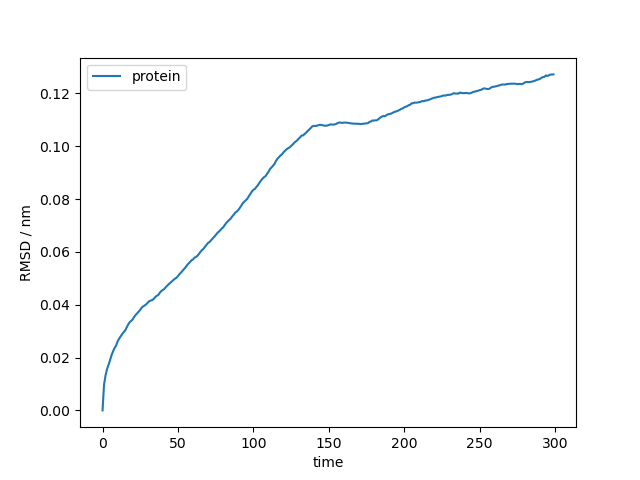

In [9]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_215104'))

In [10]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_4_natural)

Thought: To complete this task, we need to follow these steps:
1. Download the PDB file for 1LYZ
2. Set up and run a simulation for 1 ps at 300 K
3. Compute the secondary structure assignments of the downloaded PDB structure
4. Compute the RMSD of the simulation

Let's start by downloading the PDB file for 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's set up and run a simulation for 1 ps at 300 K using the SetUpandRunFunction tool.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_215255",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "system_params": {
            "nonbondedMethod": "NoCutoff",
            "constraints": "HBonds",
            "rigidWater": true
        },
        "integrator_params": {
            "integrator_type": "LangevinMiddle"

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [11]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_215255: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_215255
 1LYZ_215313: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_215317: Initial positions for simulation sim0_215317
 sim0_215317: Basic Simulation of Protein 1LYZ_215313
 rec0_215318: Simulation trajectory for protein 1LYZ_215313 and simulation sim0_215317
 rec1_215318: Simulation state log for protein 1LYZ_215313 and simulation sim0_215317
 rec2_215318: Simulation pdb frames for protein 1LYZ_215313 and simulation sim0_215317
 rec0_215510: dssp values for trajectory with id: 1LYZ_215313
 rmsd_215317: RMSD for 215317
 fig0_215514: RMSD plot for 215317


In [6]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_215255"))

In [7]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_215255", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [8]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_215318")
top_path_2 = registry_2.get_mapped_path("top_sim0_215317")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

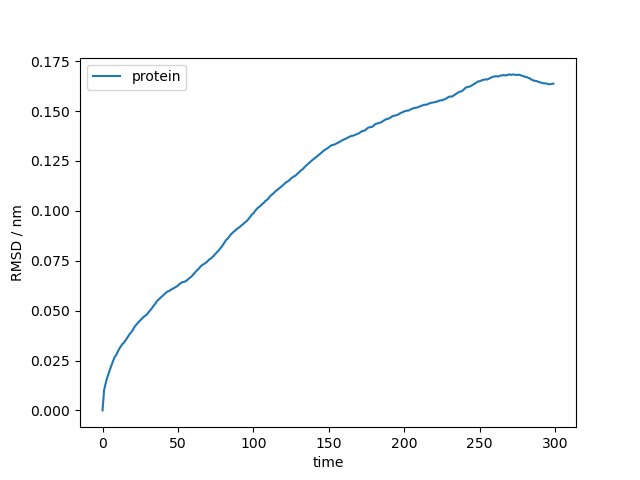

In [9]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_215514'))